# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset

In [14]:
import pathlib

base_path = pathlib.Path(pathlib.os.getcwd()) / "data" / "training_and_validation"
tf_record_path = str(list(base_path.glob("*"))[0])
dataset = get_dataset(tf_record_path)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_instances(dataset):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    colormap = {1: (1, 0, 0), 2: (0, 1, 0), 4: (0, 0, 1)}
    f, ax = plt.subplots(2, 5, figsize=(20 ,10))
    for i, batch in enumerate(dataset.shuffle(5).take(10)):
        img = batch['image'].numpy()
        gt_classes = batch['groundtruth_classes'].numpy()
        gt_boxes = batch['groundtruth_boxes'].numpy() * img.shape[0]
        
        x = i % 2
        y = i % 5
        ax[x, y].imshow(img)
        for cls, box in zip(gt_classes, gt_boxes):
            y1, x1, y2, x2 = box
            rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=colormap[cls])
            ax[x, y].add_patch(rec)
        ax[x, y].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

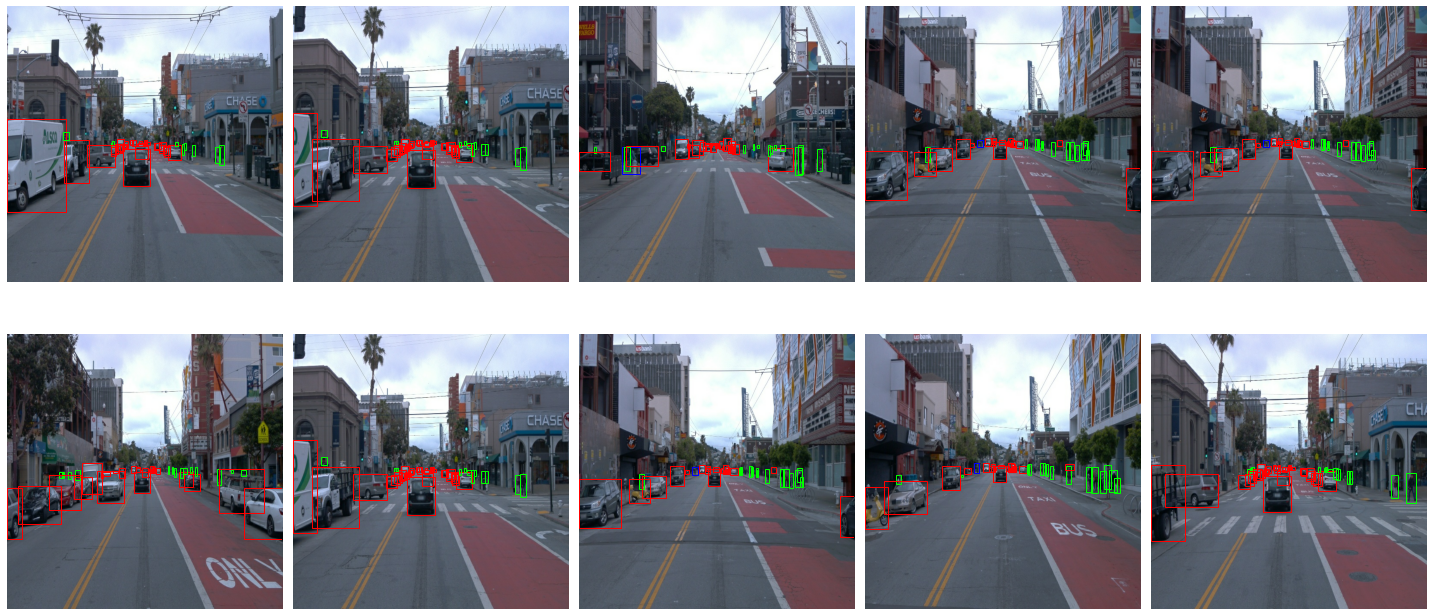

In [18]:
## STUDENT SOLUTION HERE
display_instances(dataset)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

---
When I split all .tfrecord data into train and validation data, basically I try to split them in the ratio of 8:2. However, we need to be careful about randomly splitting files in 8:2 and what we should check before is the number of each class (in the project, car, pedestrian and cyclist) of each .tfrecord file. To do this, I randomly sample images (in the code, 10000 images) from dataset of each .tfrecord file, count the number of each class and plot them below.

As you can see in the below results and plots, some of .tfrecord files do not contain pedestrains, and cyclists and this could be a problem. For example, if we split .tfrecord files randomly into train and validation data by 8:2 and accidentally validation data do not contain any cyclists, then we cannot validate model's performance of them accurately. So, to prevent this potential problem, we just need to check the number of each class of .tfrecord files and then assign each .tfrecord file to train or validation data in the ratio of 8:2 carefully to contain all classes in train and validation data both.

In [5]:
### Number of objects analysis
import pathlib
import numpy as np

from utils import get_dataset

base_path = pathlib.Path(pathlib.os.getcwd()) / "data" / "training_and_validation"
tf_record_paths = sorted(list(base_path.glob("*")))

def count_class(_dataset, _sample_num):
    class_cnt_dict = {1: 0, 2: 0, 4: 0}
    for batch in _dataset.take(_sample_num):
        gt_classes = batch['groundtruth_classes']
        for gt_cls in gt_classes.numpy():
            class_cnt_dict[gt_cls] += 1
    return class_cnt_dict

print("=" * 30)
label_map = {1: 'car', 2: 'pedestrian', 4: 'cyclist'}
total_cnt_dict = dict()
sample_num = 10000
for i, path in enumerate(tf_record_paths):
    dataset = get_dataset(str(path))
    class_cnt_dict = count_class(dataset, sample_num)
    
    filename = path.name
    total_cnt_dict[filename] = class_cnt_dict

    print(f"FILENAME[{i}] : {filename}")
    for cls, cnt in class_cnt_dict.items():
        print(f"# of {label_map[cls]}s : {cnt}")
    print("=" * 30)

FILENAME[0] : segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord
# of cars : 107007
# of pedestrians : 0
# of cyclists : 0
FILENAME[1] : segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord
# of cars : 219888
# of pedestrians : 196466
# of cyclists : 1508
FILENAME[2] : segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord
# of cars : 138439
# of pedestrians : 14041
# of cyclists : 0
FILENAME[3] : segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord
# of cars : 103758
# of pedestrians : 5969
# of cyclists : 0
FILENAME[4] : segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord
# of cars : 504593
# of pedestrians : 60980
# of cyclists : 0
FILENAME[5] : segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord
# of cars : 143086
# of pedestrians : 0
# of cyclists : 0
FILENAME[6] : segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord
# of cars :

FILENAME[45] : segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord
# of cars : 305260
# of pedestrians : 0
# of cyclists : 0
FILENAME[46] : segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord
# of cars : 374043
# of pedestrians : 29992
# of cyclists : 0
FILENAME[47] : segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord
# of cars : 73957
# of pedestrians : 0
# of cyclists : 0
FILENAME[48] : segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord
# of cars : 299431
# of pedestrians : 43966
# of cyclists : 0
FILENAME[49] : segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord
# of cars : 21053
# of pedestrians : 5044
# of cyclists : 7012
FILENAME[50] : segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord
# of cars : 58469
# of pedestrians : 0
# of cyclists : 0
FILENAME[51] : segment-11004685739714500220_2300_000_2320_000_with_camera_labels.tfrecord
# of cars : 6

FILENAME[91] : segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord
# of cars : 292244
# of pedestrians : 104496
# of cyclists : 0
FILENAME[92] : segment-12027892938363296829_4086_280_4106_280_with_camera_labels.tfrecord
# of cars : 242898
# of pedestrians : 85578
# of cyclists : 0
FILENAME[93] : segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord
# of cars : 95965
# of pedestrians : 0
# of cyclists : 0
FILENAME[94] : segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord
# of cars : 245352
# of pedestrians : 4481
# of cyclists : 10000
FILENAME[95] : segment-12174529769287588121_3848_440_3868_440_with_camera_labels.tfrecord
# of cars : 188474
# of pedestrians : 69811
# of cyclists : 4505
FILENAME[96] : segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord
# of cars : 112166
# of pedestrians : 7030
# of cyclists : 0


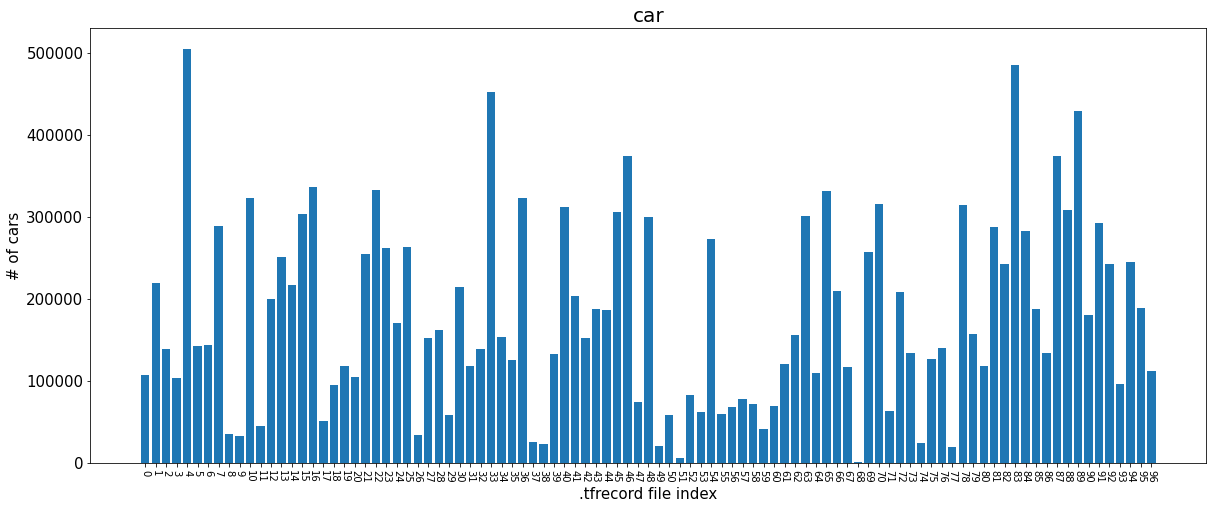

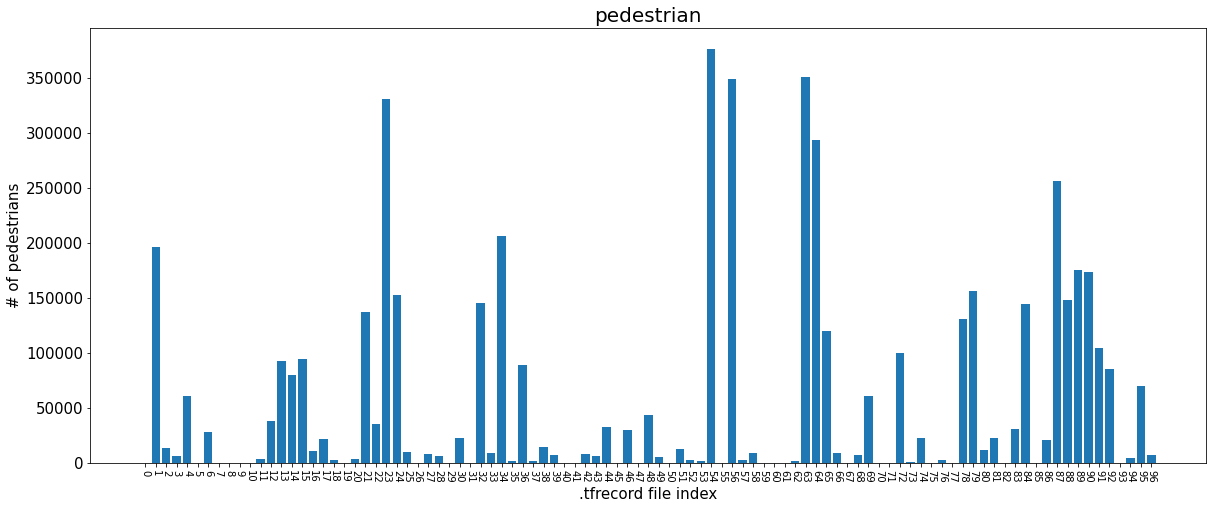

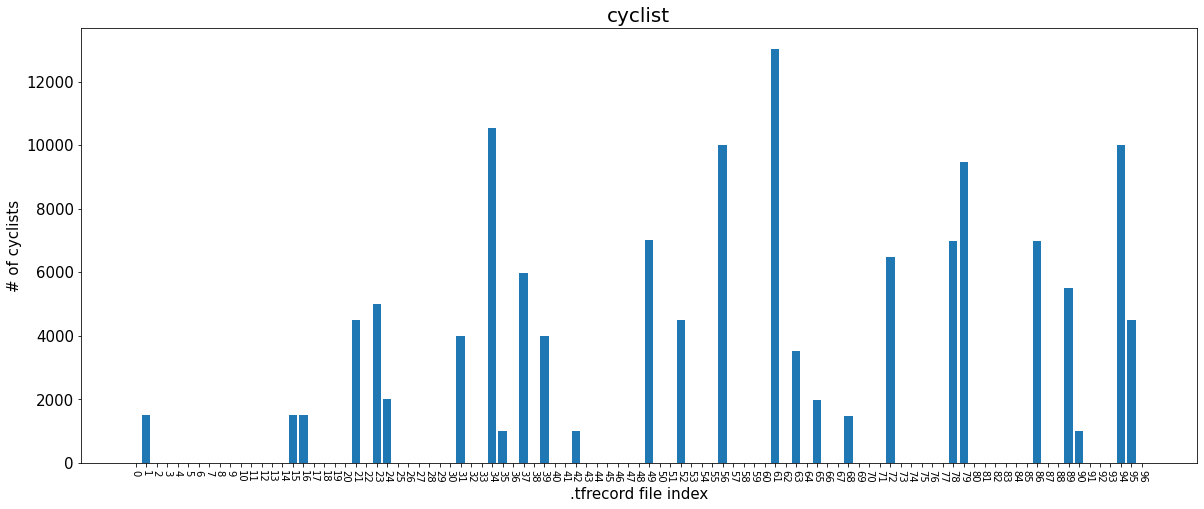

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_class_cnt(_total_cnt_dict, _class_name):
    label_map = {'car': 1, 'pedestrian': 2, 'cyclist': 4}
    class_idx = label_map[_class_name]

    class_cnt_list = []
    for filename, class_cnt_dict in total_cnt_dict.items():
        class_cnt_list.append(class_cnt_dict[class_idx])
    
    file_idx = range(len(class_cnt_list))
    plt.figure(figsize=(20,8))
    plt.bar(file_idx, class_cnt_list,)
    fontsize = 15
    plt.title(_class_name, fontsize=20)
    plt.xlabel(".tfrecord file index", fontsize=fontsize)
    plt.ylabel(f"# of {_class_name}s", fontsize=fontsize)
    plt.xticks(file_idx, rotation=-90, fontsize=10)
#     plt.tick_params(axis='x', )
    plt.yticks(fontsize=fontsize)
    
    plt.show()
    
plot_class_cnt(total_cnt_dict, 'car')
plot_class_cnt(total_cnt_dict, 'pedestrian')
plot_class_cnt(total_cnt_dict, 'cyclist')